In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix, classification_report
#from sklearn.model_selection import KFold
import csv

In [80]:
#apenas getters auxiliares

weather_rkm = pd.read_csv('weather_reverse_key_mapping.csv', index_col= 'code')#.drop(['0'], axis = 1)
season_rkm = pd.read_csv('season_reverse_key_mapping.csv', index_col= 'code')#.drop(['0.0'], axis = 1)

weather_reverse_key_mapping = {code : weather_rkm.loc[code].item() for code in weather_rkm.index}
season_reverse_key_mapping = {code : season_rkm.loc[code].item() for code in season_rkm.index}

#### Fold 0


In [81]:
fold = 0

In [82]:
x_train = pd.read_csv(f'./K Folds Cross Validation/fold_{fold}/x_train_fold_{fold}')#.drop("Unnamed: 0", axis = 1),
x_val = pd.read_csv(f'./K Folds Cross Validation/fold_{fold}/x_val_fold_{fold}')#.drop("Unnamed: 0", axis = 1)
y_train = pd.read_csv(f'./K Folds Cross Validation/fold_{fold}/y_train_fold_{fold}').drop("Unnamed: 0", axis = 1)['weather']  #abre o dataframe e ja faz o mapeamento
y_val = pd.read_csv(f'./K Folds Cross Validation/fold_{fold}/y_val_fold_{fold}').drop("Unnamed: 0", axis = 1)['weather']     #abre o dataframe e ja faz o mapeamento


In [83]:
dataset = pd.concat([x_train, y_train], axis = 1)
dataset_test = pd.concat([x_val, y_val], axis = 1)

dataset['weather'] = dataset['weather'].map(weather_reverse_key_mapping)
dataset['season'] = dataset['season'].map(season_reverse_key_mapping)

dataset_test['weather'] = dataset_test['weather'].map(weather_reverse_key_mapping)
dataset_test['season'] = dataset_test['season'].map(season_reverse_key_mapping)

In [84]:
# Inicializa o modelo KNN
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Treine o modelo
rf_model.fit(x_train, y_train)

# Faz previsões no conjunto de validação
y_predicted = rf_model.predict(x_val)


In [85]:
y_predicted = [weather_reverse_key_mapping.get(i) for i in y_predicted]
y_val = [weather_reverse_key_mapping.get(i) for i in y_val]

Text(0.5, 1.0, 'Confusion Matrix')

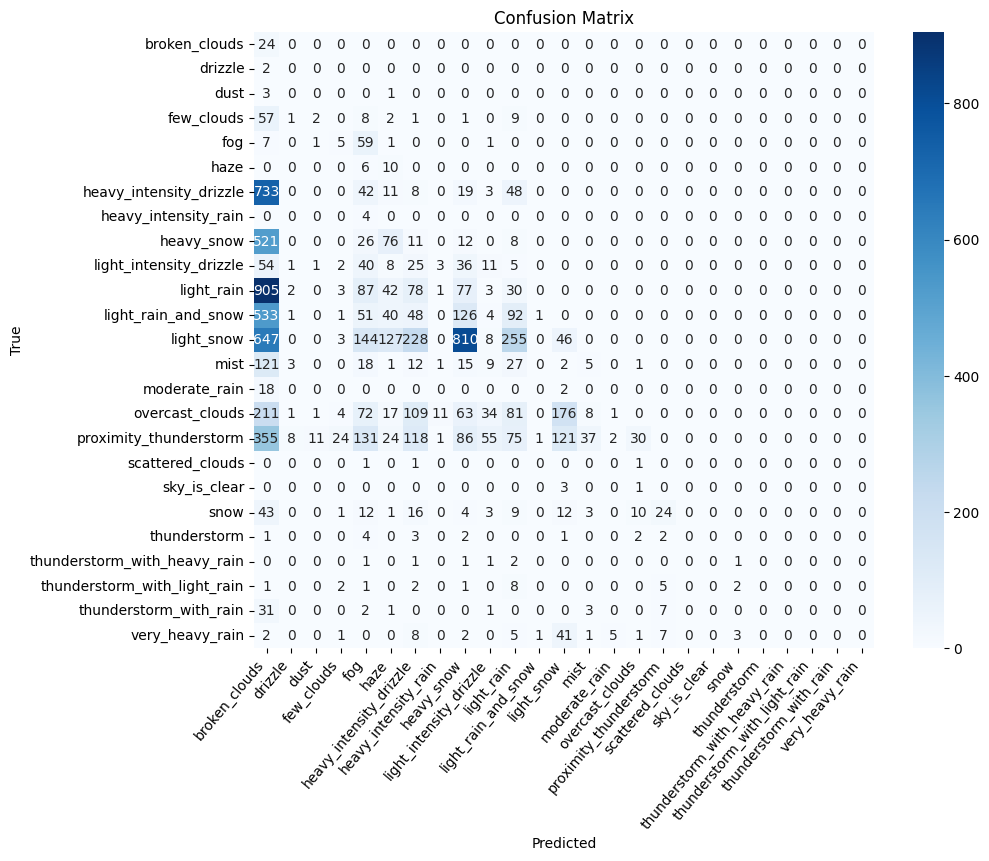

In [86]:
matrix = confusion_matrix(y_val, y_predicted, labels = pd.unique(dataset['weather']))
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels = sorted(pd.unique(dataset['weather'])), yticklabels = sorted(pd.unique(dataset['weather'])))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(rotation=50, ha = 'right')
plt.title('Confusion Matrix')


In [ ]:
report_dict = classification_report(y_val, y_predicted, labels =  pd.unique(dataset['weather']), output_dict= True)
accuracyf0 = accuracy_score(y_val, y_predicted)


In [88]:
csv_filename = f'metrics_fold_{fold}.csv'
with open(csv_filename, 'w', newline='') as metrics_file:
    metrics_writer = csv.writer(metrics_file)

    metrics_writer.writerow(['class', 'precision', 'recall', 'f1-score', 'support'])

    for class_label in pd.unique(dataset['weather']):
      metrics_writer.writerow([class_label,  report_dict.get(class_label).get('precision'), report_dict.get(class_label).get('recall'), report_dict.get(class_label).get('f1-score')])




#### Fold 1


In [89]:
fold = 1

In [90]:
x_train = pd.read_csv(f'./K Folds Cross Validation/fold_{fold}/x_train_fold_{fold}')#.drop("Unnamed: 0", axis = 1),
x_val = pd.read_csv(f'./K Folds Cross Validation/fold_{fold}/x_val_fold_{fold}')#.drop("Unnamed: 0", axis = 1)
y_train = pd.read_csv(f'./K Folds Cross Validation/fold_{fold}/y_train_fold_{fold}').drop("Unnamed: 0", axis = 1)['weather']  #abre o dataframe e ja faz o mapeamento
y_val = pd.read_csv(f'./K Folds Cross Validation/fold_{fold}/y_val_fold_{fold}').drop("Unnamed: 0", axis = 1)['weather']     #abre o dataframe e ja faz o mapeamento


In [91]:
dataset = pd.concat([x_train, y_train], axis = 1)
dataset_test = pd.concat([x_val, y_val], axis = 1)

dataset['weather'] = dataset['weather'].map(weather_reverse_key_mapping)
dataset['season'] = dataset['season'].map(season_reverse_key_mapping)

dataset_test['weather'] = dataset_test['weather'].map(weather_reverse_key_mapping)
dataset_test['season'] = dataset_test['season'].map(season_reverse_key_mapping)

In [92]:
precision_scores = []
recall_scores = []
f1_scores = []

# Inicializa o modelo KNN
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # Número de vizinhos a ser ajustado conforme necessário

# Treina o modelo
rf_model.fit(x_train, y_train)

# Faz previsões no conjunto de validação
y_predicted = rf_model.predict(x_val)


In [93]:
y_predicted = [weather_reverse_key_mapping.get(i) for i in y_predicted]
y_val = [weather_reverse_key_mapping.get(i) for i in y_val]

Text(0.5, 1.0, 'Confusion Matrix')

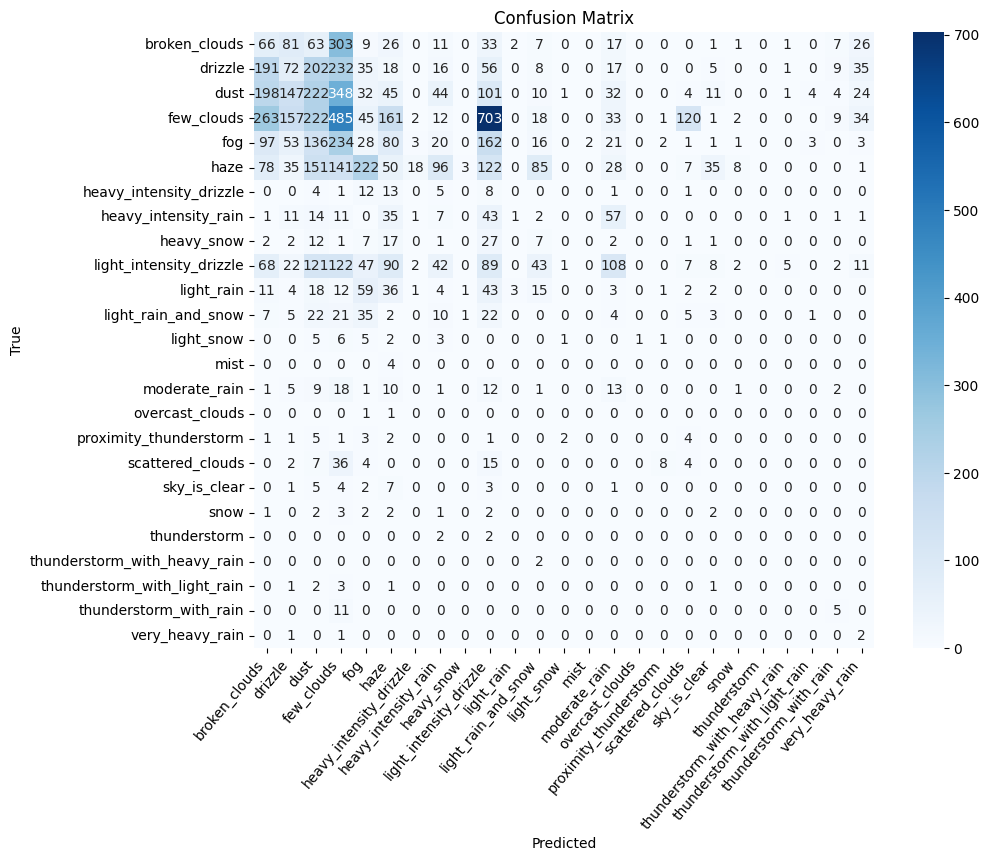

In [94]:
matrix = confusion_matrix(y_val, y_predicted, labels = pd.unique(dataset['weather']))
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels = sorted(pd.unique(dataset['weather'])), yticklabels = sorted(pd.unique(dataset['weather'])))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(rotation=50, ha = 'right')
plt.title('Confusion Matrix')



In [ ]:
report_dict = classification_report(y_val, y_predicted, labels =  pd.unique(dataset['weather']), output_dict= True)
accuracyf1 = accuracy_score(y_val, y_predicted)


In [96]:
csv_filename = f'metrics_fold_{fold}.csv'
with open(csv_filename, 'w', newline='') as metrics_file:
    metrics_writer = csv.writer(metrics_file)

    metrics_writer.writerow(['class', 'precision', 'recall', 'f1-score', 'support'])

    for class_label in pd.unique(dataset['weather']):
      metrics_writer.writerow([class_label,  report_dict.get(class_label).get('precision'), report_dict.get(class_label).get('recall'), report_dict.get(class_label).get('f1-score')])




#### Fold 2


In [97]:
fold = 2

In [98]:
x_train = pd.read_csv(f'./K Folds Cross Validation/fold_{fold}/x_train_fold_{fold}')#.drop("Unnamed: 0", axis = 1),
x_val = pd.read_csv(f'./K Folds Cross Validation/fold_{fold}/x_val_fold_{fold}')#.drop("Unnamed: 0", axis = 1)
y_train = pd.read_csv(f'./K Folds Cross Validation/fold_{fold}/y_train_fold_{fold}').drop("Unnamed: 0", axis = 1)['weather']  #abre o dataframe e ja faz o mapeamento
y_val = pd.read_csv(f'./K Folds Cross Validation/fold_{fold}/y_val_fold_{fold}').drop("Unnamed: 0", axis = 1)['weather']     #abre o dataframe e ja faz o mapeamento


In [99]:
dataset = pd.concat([x_train, y_train], axis = 1)
dataset_test = pd.concat([x_val, y_val], axis = 1)

dataset['weather'] = dataset['weather'].map(weather_reverse_key_mapping)
dataset['season'] = dataset['season'].map(season_reverse_key_mapping)

dataset_test['weather'] = dataset_test['weather'].map(weather_reverse_key_mapping)
dataset_test['season'] = dataset_test['season'].map(season_reverse_key_mapping)

In [100]:
precision_scores = []
recall_scores = []
f1_scores = []

# Inicializa o modelo KNN
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # Número de vizinhos a ser ajustado conforme necessário

# Treina o modelo
rf_model.fit(x_train, y_train)

# Faz previsões no conjunto de validação
y_predicted = rf_model.predict(x_val)


In [101]:
y_predicted = [weather_reverse_key_mapping.get(i) for i in y_predicted]
y_val = [weather_reverse_key_mapping.get(i) for i in y_val]

Text(0.5, 1.0, 'Confusion Matrix')

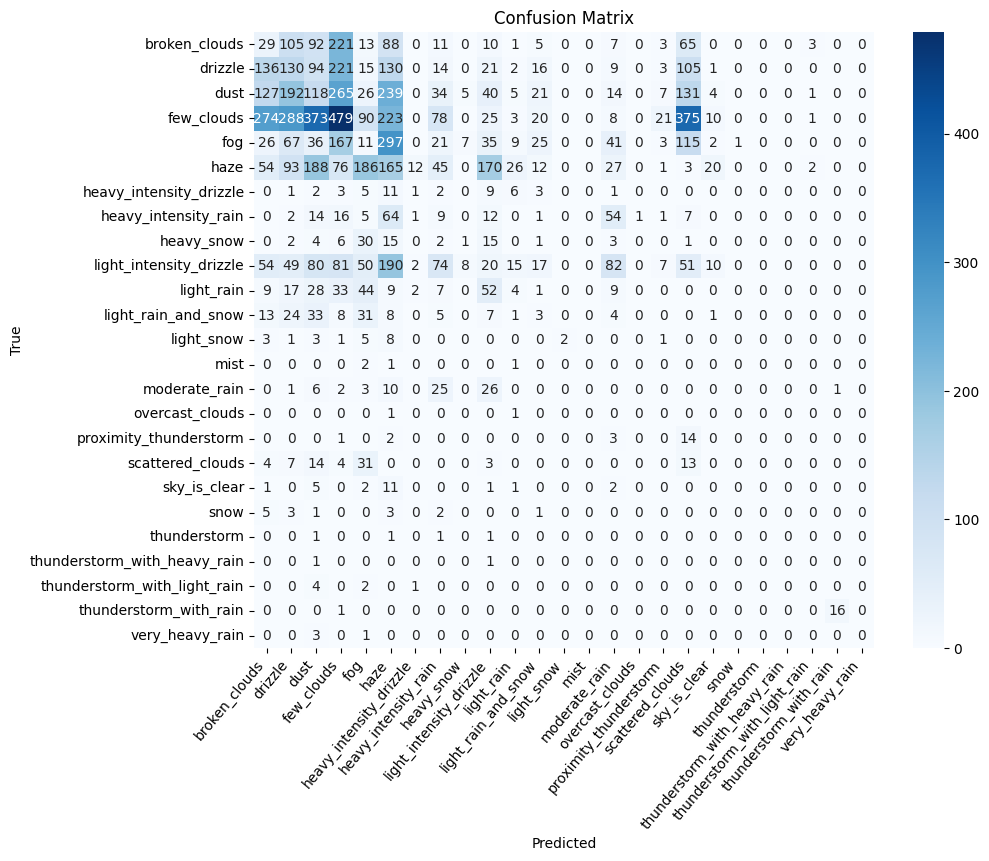

In [102]:
matrix = confusion_matrix(y_val, y_predicted, labels = pd.unique(dataset['weather']))
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels = sorted(pd.unique(dataset['weather'])), yticklabels = sorted(pd.unique(dataset['weather'])))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(rotation=50, ha = 'right')
plt.title('Confusion Matrix')


In [ ]:
report_dict = classification_report(y_val, y_predicted, labels =  pd.unique(dataset['weather']), output_dict= True)
accuracyf2 = accuracy_score(y_val, y_predicted)



In [104]:
csv_filename = f'metrics_fold_{fold}.csv'
with open(csv_filename, 'w', newline='') as metrics_file:
    metrics_writer = csv.writer(metrics_file)

    metrics_writer.writerow(['class', 'precision', 'recall', 'f1-score', 'support'])

    for class_label in pd.unique(dataset['weather']):
      metrics_writer.writerow([class_label,  report_dict.get(class_label).get('precision'), report_dict.get(class_label).get('recall'), report_dict.get(class_label).get('f1-score')])




#### Fold 3


In [105]:
fold = 3

In [106]:
x_train = pd.read_csv(f'./K Folds Cross Validation/fold_{fold}/x_train_fold_{fold}')#.drop("Unnamed: 0", axis = 1),
x_val = pd.read_csv(f'./K Folds Cross Validation/fold_{fold}/x_val_fold_{fold}')#.drop("Unnamed: 0", axis = 1)
y_train = pd.read_csv(f'./K Folds Cross Validation/fold_{fold}/y_train_fold_{fold}').drop("Unnamed: 0", axis = 1)['weather']  #abre o dataframe e ja faz o mapeamento
y_val = pd.read_csv(f'./K Folds Cross Validation/fold_{fold}/y_val_fold_{fold}').drop("Unnamed: 0", axis = 1)['weather']     #abre o dataframe e ja faz o mapeamento


In [107]:
dataset = pd.concat([x_train, y_train], axis = 1)
dataset_test = pd.concat([x_val, y_val], axis = 1)

dataset['weather'] = dataset['weather'].map(weather_reverse_key_mapping)
dataset['season'] = dataset['season'].map(season_reverse_key_mapping)

dataset_test['weather'] = dataset_test['weather'].map(weather_reverse_key_mapping)
dataset_test['season'] = dataset_test['season'].map(season_reverse_key_mapping)

In [108]:
precision_scores = []
recall_scores = []
f1_scores = []

# Inicializa o modelo KNN
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # Número de vizinhos a ser ajustado conforme necessário

# Treina o modelo
rf_model.fit(x_train, y_train)

# Faz previsões no conjunto de validação
y_predicted = rf_model.predict(x_val)


In [109]:
y_predicted = [weather_reverse_key_mapping.get(i) for i in y_predicted]
y_val = [weather_reverse_key_mapping.get(i) for i in y_val]

Text(0.5, 1.0, 'Confusion Matrix')

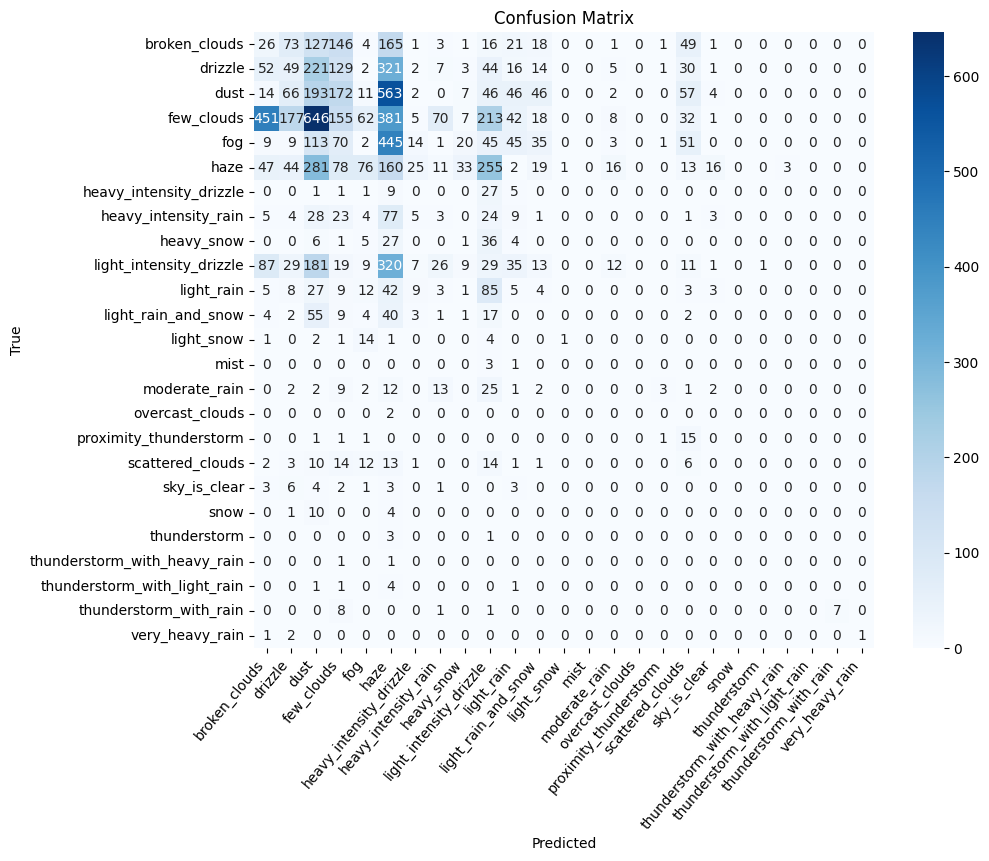

In [110]:
matrix = confusion_matrix(y_val, y_predicted, labels = pd.unique(dataset['weather']))
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels = sorted(pd.unique(dataset['weather'])), yticklabels = sorted(pd.unique(dataset['weather'])))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(rotation=50, ha = 'right')
plt.title('Confusion Matrix')


In [ ]:
report_dict = classification_report(y_val, y_predicted, labels =  pd.unique(dataset['weather']), output_dict= True)
accuracyf3 = accuracy_score(y_val, y_predicted)


In [112]:
csv_filename = f'metrics_fold_{fold}.csv'
with open(csv_filename, 'w', newline='') as metrics_file:
    metrics_writer = csv.writer(metrics_file)

    metrics_writer.writerow(['class', 'precision', 'recall', 'f1-score', 'support'])

    for class_label in pd.unique(dataset['weather']):
      metrics_writer.writerow([class_label,  report_dict.get(class_label).get('precision'), report_dict.get(class_label).get('recall'), report_dict.get(class_label).get('f1-score')])




#### Fold 4


In [113]:
fold = 4

In [114]:
x_train = pd.read_csv(f'./K Folds Cross Validation/fold_{fold}/x_train_fold_{fold}')#.drop("Unnamed: 0", axis = 1),
x_val = pd.read_csv(f'./K Folds Cross Validation/fold_{fold}/x_val_fold_{fold}')#.drop("Unnamed: 0", axis = 1)
y_train = pd.read_csv(f'./K Folds Cross Validation/fold_{fold}/y_train_fold_{fold}').drop("Unnamed: 0", axis = 1)['weather']  #abre o dataframe e ja faz o mapeamento
y_val = pd.read_csv(f'./K Folds Cross Validation/fold_{fold}/y_val_fold_{fold}').drop("Unnamed: 0", axis = 1)['weather']     #abre o dataframe e ja faz o mapeamento


In [115]:
dataset = pd.concat([x_train, y_train], axis = 1)
dataset_test = pd.concat([x_val, y_val], axis = 1)

dataset['weather'] = dataset['weather'].map(weather_reverse_key_mapping)
dataset['season'] = dataset['season'].map(season_reverse_key_mapping)

dataset_test['weather'] = dataset_test['weather'].map(weather_reverse_key_mapping)
dataset_test['season'] = dataset_test['season'].map(season_reverse_key_mapping)

In [116]:
precision_scores = []
recall_scores = []
f1_scores = []

# Inicializa o modelo KNN
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # Número de vizinhos a ser ajustado conforme necessário

# Treina o modelo
rf_model.fit(x_train, y_train)

# Faz previsões no conjunto de validação
y_predicted = rf_model.predict(x_val)


In [117]:
y_predicted = [weather_reverse_key_mapping.get(i) for i in y_predicted]
y_val = [weather_reverse_key_mapping.get(i) for i in y_val]

Text(0.5, 1.0, 'Confusion Matrix')

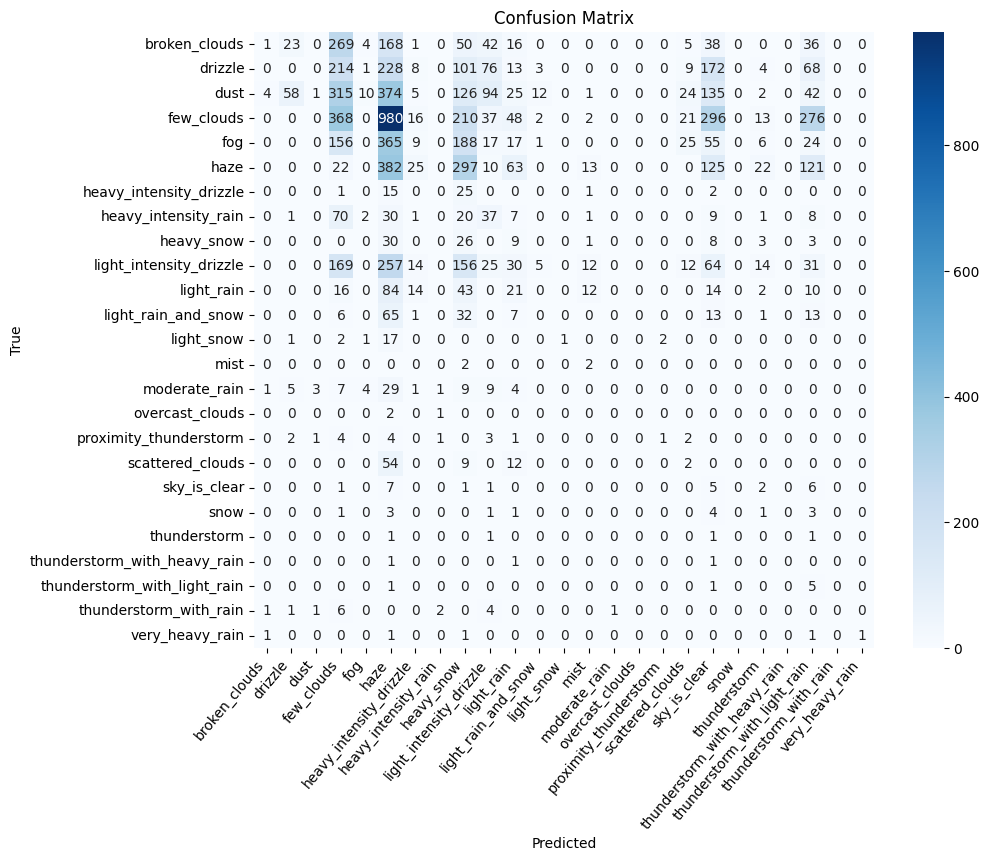

In [118]:
matrix = confusion_matrix(y_val, y_predicted, labels = pd.unique(dataset['weather']))
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels = sorted(pd.unique(dataset['weather'])), yticklabels = sorted(pd.unique(dataset['weather'])))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(rotation=50, ha = 'right')
plt.title('Confusion Matrix')



In [ ]:
report_dict = classification_report(y_val, y_predicted, labels =  pd.unique(dataset['weather']), output_dict= True)
accuracyf4 = accuracy_score(y_val, y_predicted)


In [120]:
csv_filename = f'metrics_fold_{fold}.csv'
with open(csv_filename, 'w', newline='') as metrics_file:
    metrics_writer = csv.writer(metrics_file)

    metrics_writer.writerow(['class', 'precision', 'recall', 'f1-score', 'support'])

    for class_label in pd.unique(dataset['weather']):
      metrics_writer.writerow([class_label,  report_dict.get(class_label).get('precision'), report_dict.get(class_label).get('recall'), report_dict.get(class_label).get('f1-score')])




#### Accuracy

In [121]:
csv_filename = f'accuracy.csv'
with open(csv_filename, 'w', newline='') as metrics_file:
    metrics_writer = csv.writer(metrics_file)

    metrics_writer.writerow(['fold_0', 'fold_1', 'fold_2', 'fold_3', 'fold_4'])
    metrics_writer.writerow([accuracyf0, accuracyf1, accuracyf2, accuracyf3, accuracyf4])
